
# Práctico 2: Análisis y Curación

### Objetivos: 

Curar el conjunto de datos para poder utilizarlos en próximos análisis. Tener en cuenta:

+ Datos faltantes, datos nulos, ¿los eliminamos? ¿nos dicen algo? ¿podemos completarlos?
+ Consistencia de los datos, ¿existe información contradictoria? ¿Qué hacemos si la hay?
+ Outliers, ¿tenemos?, ¿cómo los tratamos? 
+ Indagar en la forma en que está presentada la información, ¿podríamos re organizarla de otra manera?
+ Considerar la posibilidad de crear nuevas variables (columnas) en base a las ya disponibles 
(o quizás incorporando otra información). 
Esto puede ser útil para algún análisis que nos propongamos hacer a futuro.


Puesto que este dataset fue creado y es mantenido por una sola persona, 
algunos de los incisos anteriores están orientados a mejorar la consistencia y calidad del mismo. 
Una buena idea puede ser compararlo con otros dataset similares, 
por ejemplo: https://github.com/SistemasMapache/Covid19arData


### Tareas a realizar:

* Detectar al menos **tres** variables con valores faltantes no triviales. 
Decidir qué tratamiento darles (eliminarlos, computarlos, etc.), investigar los métodos disponibles en pandas para dichos fines.

* Detectar al menos **cinco** inconsistencias en los datos, discutir a qué se deben y si podemos solucionarlas.
 
* Elegir al menos **una** variable que tenga outliers, debatir y decidir qué hacer con los mismos.

* Bonus (solo si tienen ganas y tiempo): Debatir: 
¿Hay variables que son redundantes o solo agregan ruido? ¿Las eliminarían? 
¿Agregarían otras variables que puedan ser de utilidad? ¿Pueden generar nuevas variables a partir de las existentes? 
Por ejemplo, transformando, escalando o combinando variables existentes. 
Contrastar con otras fuentes (otros datasets, reportes provinciales, prensa) si la información es correcta.
Comparar el dataset con otros similares, ¿cuáles son las semejanzas y diferencias? ¿consideran las mismas variables o equivalentes? 
¿hay información contradictoria?... O cualquier otro interrogante que les surja en torno a estos datos.

### Entregas:

+ Un **brevísimo informe** (entre una y dos páginas) en el cual expliquen con sus palabras qué encontraron, 
cómo interpretaron y qué soluciones proponen y/o aplicaron. 
Pueden agregar con total sinceridad las observaciones que tengan sobre la consistencia y calidad de los datos, 
comparación con otros datasets, etc. (me sería de gran ayuda!)

+ El o los **data sets modificados** con los cambios propuestos (limpios y curados).

+ Una **notebook** (o **script**) que refleje el trabajo realizado. 
No les voy a corregir el código en detalle, es para tener una idea de cómo fue el proceso.

## Valores Faltantes

* Detectar al menos **tres** variables con valores faltantes no triviales. 
Decidir qué tratamiento darles (eliminarlos, computarlos, etc.), investigar los métodos disponibles en pandas para dichos fines.

In [1]:
import os
import datetime
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/lucia15/Datos-Covid19-Argentina/master'

file1 = os.path.join(url, 'Argentina-covid19.csv')

data1 = pd.read_csv(file1, error_bad_lines=False)

file2 = os.path.join(url, 'Argentina-covid19-por-provincia.csv')

data2 = pd.read_csv(file2, error_bad_lines=False)

file3 = os.path.join(url, 'Argentina-covid19-fallecidos.csv')

data3 = pd.read_csv(file3, error_bad_lines=False)

In [2]:
df = data1['comunitario_nuevos'].isnull()
df[df==True]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
Name: comunitario_nuevos, dtype: bool

##### FALTANTES

A continuación se hace un análisis de los datos ausentes en las distintas variables del dataset _'Argentina-covid19.csv'_.

En las _'variables %mujer'_, _'%varon'_, _'mujer_total'_, _'varon_total'_ hay faltantes los primeros 20 días donde no se reportaba el género de los infectados, y patir de ahí no vuelven a haber faltantes hasta el día 20 de Junio (fila 106) donde no se  publicó el informe diario matutino (el vespertino si se publicó).

En las variables _'franja_etaria'_, _'edad_prom'_ se repiten los faltantes anteriores, y se suman los días desde el 7 de Julio en adelante, en este periodo se publicaron reportes matutinos todos los días pero faltan varios reportes vespertinos. Debido a esto algunas varialbes se pueden completar y para otras hay faltantes.

En la variable _comunitario_nuevos_ faltan los primeros 28 días, esto se puede deber a no hubieron casos comunitarios durante los primeros días registrados, pero todavía no se reportaba por el ministerio de salud nacional. Es posible reemplazar por 0, si corresponde.

Las variable _'alta_total'_ y _'alta_nuevos'_ presentan el faltante del día 20 de Junio, y varios faltantes durante los primeros 20 días. Sobre estos últimos, se reporta el primer alta el día 12 de Marzo (fila 7) y a partir de ahí faltan datos en estas variables hasta el 23 de Marzo. Es posible que este dato no se reportara durante esos días. Ya el 23 de Marzo habían datos de altas totales por lo que no se pueden completar los faltantes sin recurrir a funtes alternativas. Además la variable _'alta_nuevos'_ tiene faltantes a desde el día 20 de Junio hasta el final por que, seguranmente, se calculaba tomando la diferencia de altas totales de cada día con el anterior. Este faltante se puede completar para los días posteriores al 21 de Junio. Esto mismo les sucede a las variables _'descartados_total'_ y _'descartados_nuevos'_.

Finalmente la variable _'alta_definitiva'_ tiene más faltantes que datos. Cuando aún no habían altas es consistente, su valor es cero. El día de la primer alta y de ahí en adelante tiene valor _NaN_, esto nos hace pensar que no hay información sobre si las altas son definitivas o no. Solo entre los días 25 de Marzo y 5 de Abril, esta variable tiene datos, probablemente fue el único periodo donde se informó cuantas de las altas eran definitivas. Esta variable no se puede completar sin información de otras fuentes.

En cuanto a los tests, hay datos desde el día 7 de Julio en las variables _'tests_realizados_total'_, _'tests_realizados_nuevos'_, _'test_por_millon_hab'_. Tiene además el faltante de día 20 de  Junio. Es improbable que otras fuentes, alternativas al ministerio de salud, tengan datos de la cantidad de tests realizados previos al dato repotado.

La información de los internados en terapia intensiva, datos en las variables _'UTI_internados'_, _'UTI__%_Nacion'_, _'UTI__%_AMBA'_, hay datos apartir del día 24 de Junio (fila 111). No hay faltantes posteriores, y los datos previos probablemente no estén publicados, por lo que no se podrían completar.

## Inconsistencias

* Detectar al menos **cinco** inconsistencias en los datos, discutir a qué se deben y si podemos solucionarlas.

Inconsistecia del día 30 de Marzo (fila 25). Habían reportados 20 fallecientos en total en el reporte vespertino del día 29, el reporte matutino del día 30 suma un fallecimiento, y el reporte verpertino del mismo día suma cuatro fallecimientos nuevos, pero reporta un total de 24 muertes totales. En este caso la inconsistecia está en la fuente de los datos. En los informes del día siguiente, 31 de Marzo, no se rectifica esta inconsistencia, y se considera que el numero de fallecidos es efectivamente 24. Puede deberse la inconsistencia que el fallecimiento del reporte matutino del 30 haya sido rectificado, en alguno de sus datos, y este incluído en el vespertino. De ser así en el dataset se debería restar un caso al día 29. Sin más información no se puede corregir la inconsistencia.

En el caso de los días 2 y 3 de Abril (filas 28 y 29) sucede que hay muertes que se están contando de manera erronea al cargarlas a la base de datos. El criterio parece ser que incluye a las muertes del reporte matutino en el dato de muertes nuevas del día anterior. Por lo que la muertes acumaluadas pueden no coincidir con el dato del reporte vespertino del día. En este caso el reporte vespertinos del 2 de Abril incluye las dos muertes del reporte matutino del mismo día, por lo que de la manera en que sea cargan los datos de se debería corregir el número de muertes nuevas de 4 a 3, las dos del vespertino del 2 y una del matutino del 3 de Abril. Eso hace consistente el dato de 37 muertes el 2/04.

El día 3 de Abril sucede de forma distinta al día anterior. En el matutino se reporta una muerte, y luego el vespertino suma 5 muertes sin contar la anterior. En el siguente reporte matutino no hay muertes nuevas, por lo que las muertes de 3 de Abril deben ser 5 en lugar de las 6 que figuran en la base de datos, debido a que la muerte del reporte matutino del mismo día ya había sido contabilizada en las 37 totales del día anterior.

Se pueden corregir estas inconsistencias cambiando el número de muertes nuevas los día 2 y 3 de Abril por los correctos.

El en día 30 de Abril (fila 56) se puede observar que las muertes acumuladas coinciden con las reportadas en el informe vespertino de ese día. Por otro lado, en el día anterior, las muertes tambien coinciden con las del reporte vespertino de ese día. Podemos asumir que aquí ya se esta usando el criterio de que la entrada de muertes totales coincida con los reportes vespertinos, por lo que las muertes registradas en los reportes matutinos se deben sumar a las del vespertino del mismo día. Entonces, el 30 en el reporte matutino se informa una muertes y en verpertino 3, por lo que el total debe ser de 4 en lugar de 3 como en la base de datos.

El caso del día 22 de Mayo (fila 78) presenta una inconsistencia. Las muertes totales del mismo día y del anterior coinciden con los reportes, pero las muertes nuevas no coinciden, se informan 3 en el reporte matutino y 14 en el verpertino, que suman 17, mientras en la base de datos figuran 18.

## Outliers

* Elegir al menos **una** variable que tenga outliers, debatir y decidir qué hacer con los mismos.

In [3]:
import seaborn as sns

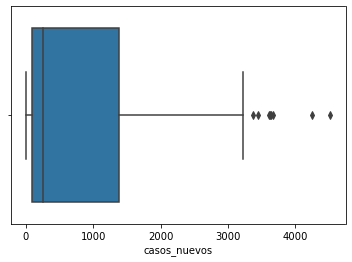

In [4]:
sns.boxplot(data1['casos_nuevos'])

In [5]:
data1_outliers =  data1[ data1['casos_nuevos'] > data1['casos_nuevos'].mean() + 3.0*data1['casos_nuevos'].std() ]

data1_outliers

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,...,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
134,2020-07-17,119.0,4518,119301,"49,3","50,7",58815.0,60486.0,NaN,NaN,...,NaN,322583.0,NaN,531753.0,12472.0,"11718,6",823.0,"53,7","63,2",NaN


149.0808823529412 +/-$ 251.03949977368714


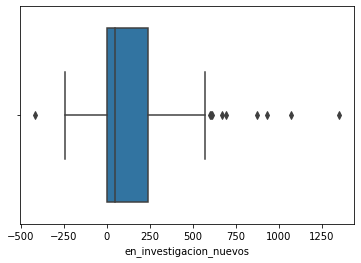

In [6]:
select = 'en_investigacion_nuevos'

sns.boxplot(data1[select])
print(data1[select].mean(),'+/-$',data1[select].std())

In [7]:
data1_outliers_up =  data1[ data1['en_investigacion_nuevos'] > data1['en_investigacion_nuevos'].mean() + 2.0*data1['en_investigacion_nuevos'].std()]

data1_outliers_dw =  data1[ data1['en_investigacion_nuevos'] < data1['en_investigacion_nuevos'].mean() - 2.0*data1['en_investigacion_nuevos'].std() ]

In [8]:
data1_outliers = pd.concat([data1_outliers_dw, data1_outliers_up])
data1_outliers

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,...,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
117,2020-06-30,102.0,2262,64530,"49,4","50,6",31878.0,32652.0,20-59,36.0,...,NaN,236563.0,NaN,362908.0,10506.0,7997,555.0,"50,5","55,5",NaN
122,2020-07-05,107.0,2439,77815,"49,5","50,5",38518.0,39297.0,20-59,36.0,...,NaN,258801.0,NaN,406210.0,6756.0,"8951,9",658.0,"51,4","57,7",NaN
125,2020-07-08,110.0,3604,87030,"49,4","50,6",42993.0,44037.0,20-59,36.0,...,NaN,273168.0,NaN,434692.0,10910.0,"9579,6",671.0,"52,4","59,7",NaN
126,2020-07-09,111.0,3663,90693,"49,4","50,6",44802.0,45891.0,NaN,NaN,...,NaN,278647.0,NaN,445733.0,11041.0,"9822,9",662.0,"52,4","58,3",NaN
128,2020-07-11,113.0,3449,97509,"49,4","50,6",48169.0,49340.0,NaN,NaN,...,NaN,289032.0,NaN,466308.0,10266.0,"10276,4",NaN,NaN,NaN,Reporte vespertino 20-07-11 no fue publicado e...
133,2020-07-16,118.0,3624,114783,"49,3","50,7",56588.0,58195.0,NaN,NaN,...,NaN,316346.0,NaN,519281.0,11053.0,"11443,8",793.0,"53,9",64,NaN
134,2020-07-17,119.0,4518,119301,"49,3","50,7",58815.0,60486.0,NaN,NaN,...,NaN,322583.0,NaN,531753.0,12472.0,"11718,6",823.0,"53,7","63,2",NaN


In [9]:
data1_outliers['en_investigacion_nuevos'][117]

-419

In [10]:
data1_outliers[116:118]

,fecha,dia_cuarentena,casos_nuevos,casos_total,%mujer,%varon,mujer_total,varon_total,franja_etaria,edad_prom,...,alta_definitiva,descartados_total,descartados_nuevos,tests_realizados_total,tests_realizados_nuevos,test_por_millon_hab,UTI_internados,UTI_%Nacion,UTI_%AMBA,observaciones
